In [1]:
!pip install tensorflow

In [2]:
!pip install numpy

##### 1. Thêm các thư viện cần thiết

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import concatenate

##### 2. Thiết kế model

In [5]:
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import SGD

In [6]:
model = Sequential()

In [7]:
width = 32
height = 32
classes = 10

In [8]:
shape = (width,height, 3)

##### Block 1: Convolution + Max-Pulling

In [9]:
model.add(Conv2D(32, (3 , 3), padding='same', input_shape=shape))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(32, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

##### Block 2: Convolution + Max-Pulling

In [10]:
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3 , 3), padding='same'))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

In [11]:
# Connected Network

##### Block 3

In [12]:
model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(classes))

In [13]:
model.add(Activation("softmax"))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0

##### 3. Load data

In [15]:
from tensorflow.keras.datasets import cifar10

In [16]:
((trainX, trainY), (testX, testY)) = cifar10.load_data()

##### Plot ngẫu nhiên 1 ảnh

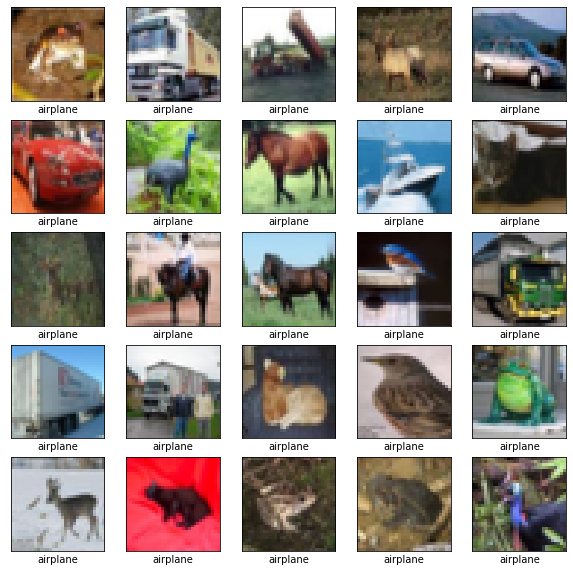

In [31]:
import matplotlib.pyplot as plt

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[trainY[i][0]])
plt.show()

##### 4. Chuẩn hoá data

Chuyển về dạng one hot.

In [18]:
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
testY = lb.transform(testY)

Đưa dữ liệu về trong khoảng (0,1)

In [19]:
trainX = trainX.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

In [20]:
labelNames = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

Tăng cường data

In [21]:
aug = ImageDataGenerator(rotation_range=18, zoom_range=0.15, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15, horizontal_flip=True, fill_mode="nearest")

##### 5. Tiến hành training

In [22]:
learning_rate = 1e-2
batch_size = 1024
num_epochs = 1 # Accuracy: 74% within 30 epochs

Chỉ số decay nhằm điều chỉnh learning rate. Đọc thêm ở đây https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

In [23]:
opt = SGD(lr=learning_rate, momentum=0.9, decay=learning_rate / num_epochs)
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [24]:
print("Start Training...")
H = model.fit_generator(aug.flow(trainX, trainY, batch_size=batch_size), validation_data=(testX, testY), 
                        steps_per_epoch=trainX.shape[0] // batch_size, epochs=num_epochs, verbose=1)

Start Training...
48/48 [==============================] - 223s 5s/step - loss: 2.3402 - accuracy: 0.3039 - val_loss: 2.4474 - val_accuracy: 0.1126


##### 6. Lưu model và load lại nhằm inference

In [25]:
model.save('gryqhon_no_model.h5')

In [26]:
model = tf.keras.models.load_model("saved_model.h5")

In [27]:
result = model.predict(np.array(testX[0:1]/255.0))

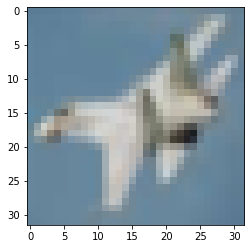

In [28]:
plt.imshow(testX[10], cmap=plt.cm.binary)

In [29]:
predicted_label = np.argmax(result)

In [30]:
labelNames[predicted_label]

'bird'